# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [379]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

In [380]:
da.head()


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [381]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [382]:
# enter your code here
#filtering by women between the age of 35 and 50
da['DMDMARTL'].head()
samplew=da[da['RIAGENDR']==2]
samplewo=samplew[samplew['RIDAGEYR']<51]
samplewom=samplewo[samplewo['RIDAGEYR']>34]



In [383]:
pd.crosstab(samplewom.DMDMARTL, samplewom.DMDEDUC2)

DMDEDUC2,1.0,2.0,3.0,4.0,5.0
DMDMARTL,,,,,
1.0,41,43,64,139,162
2.0,2,0,3,2,7
3.0,6,7,16,45,26
4.0,11,9,10,11,2
5.0,12,15,22,35,31
6.0,11,6,18,25,6


In [384]:
#sample of married and not married women
married= samplewom[samplewom['DMDMARTL']==1]
notmarried = samplewom[samplewom['DMDMARTL']!=1]


In [385]:
pd.crosstab(married.DMDMARTL, married.DMDEDUC2)

DMDEDUC2,1.0,2.0,3.0,4.0,5.0
DMDMARTL,,,,,
1.0,41,43,64,139,162


In [213]:
pd.crosstab(notmarried.DMDMARTL, notmarried.DMDEDUC2)

DMDEDUC2,1.0,2.0,3.0,4.0,5.0
DMDMARTL,,,,,
2.0,2,0,3,2,7
3.0,6,7,16,45,26
4.0,11,9,10,11,2
5.0,12,15,22,35,31
6.0,11,6,18,25,6


In [228]:
#calculate women who have completed college within each group, which is DMDEDUC2=5

m_g = married[married ['DMDEDUC2']==5]
nm_g = notmarried[notmarried ['DMDEDUC2']==5]


In [215]:
# calculate percentage of women who have completed college within each group
p_m_g = (m_g['DMDEDUC2'].value_counts() / married['DMDEDUC2'].value_counts().sum()) 
p_nm_g = (nm_g['DMDEDUC2'].value_counts() / notmarried['DMDEDUC2'].value_counts().sum())



print(p_m_g, 
      p_nm_g)

5.0    0.360802
Name: DMDEDUC2, dtype: float64 5.0    0.213018
Name: DMDEDUC2, dtype: float64


In [216]:
p1 = p_m_g
p2 = p_nm_g

n1 = married['DMDEDUC2'].value_counts().sum()
n2= notmarried['DMDEDUC2'].value_counts().sum()

In [218]:
#standard error

se_m_g = np.sqrt(p1 * (1-p1) / n1)
print(se_m_g)

se_nm_g = np.sqrt(p2 * (1-p2) / n2)
print(se_nm_g)



5.0    0.022664
Name: DMDEDUC2, dtype: float64
5.0    0.022271
Name: DMDEDUC2, dtype: float64


In [219]:
#CI for married women
lcb_m = p1 - 1.96 * np.sqrt(p1 * (1 - p1) / n1)  
ucb_m= p1 + 1.96 * np.sqrt(p1 * (1 - p1) / n1)  
print(lcb_m, ucb_m)

5.0    0.316381
Name: DMDEDUC2, dtype: float64 5.0    0.405222
Name: DMDEDUC2, dtype: float64


In [221]:
#CI for not married women
lcb_nm = p2 - 1.96 * np.sqrt(p2 * (1 - p2) / n2)  
ucb_nm= p2 + 1.96 * np.sqrt(p2 * (1 - p2) / n2)  
print(lcb_nm, ucb_nm)

5.0    0.169367
Name: DMDEDUC2, dtype: float64 5.0    0.256668
Name: DMDEDUC2, dtype: float64


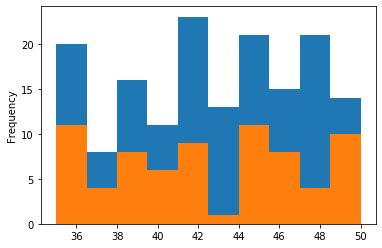

In [222]:
samplew_m_g['RIDAGEYR'].plot(kind='hist')

samplew_nm_g['RIDAGEYR'].plot(kind='hist')

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

CI_m = ucb_m - lcb_m
CI_nm = ucb_nm - lcb_nm

print(CI_m, CI_nm)




__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [386]:
# enter your code here

da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})


In [387]:

dx = da[["SMQ020x", "RIAGENDRx"]].dropna()  # dropna drops cases where either variable is missing
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)


RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [232]:
dz = dx.groupby(dx.RIAGENDRx).agg({"SMQ020x": [lambda x: np.mean(x=="Yes"), np.size]})

dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [234]:
pf = dz.Proportion.Female # Female proportion
nf = dz.Total_n.Female # Total number of females
se_female = np.sqrt(pf * (1 - pf) / nf)
print(se_female)

pm = dz.Proportion.Male # Male proportion
nm = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(pm * (1 - pm) / nm)
print(se_male)

0.008444152146214435
0.009526078653689868


In [235]:
#Female CI
lcb_f = pf - 1.96 * np.sqrt(pf * (1 - pf) / nf)  
ucb_f = pf + 1.96 * np.sqrt(pf * (1 - pf) / nf)  
print(lcb_f, ucb_f)

0.288294683866098 0.32139576027925865


In [318]:
#Male CI
lcb_m = pm - 1.96 * np.sqrt(pm * (1 - pm) / nm)  
ucb_m = pm + 1.96 * np.sqrt(pm * (1 - pm) / nm)  
print(lcb_m, ucb_m)


0.49458714955108174 0.531929377873546


In [237]:
CIf = sm.stats.proportion_confint(906, 906+2066)  
CIm = sm.stats.proportion_confint(1413, 1413+1340)  
print(CIf,CIm)

(0.2882949879861214, 0.32139545615923526) (0.49458749263718593, 0.5319290347874418)


__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

In [295]:

da['SMQ020x'].count()
x = dx[dx['SMQ020x']=='Yes']
pa = x['SMQ020x'].count() / da['SMQ020x'].count()
pa

0.4050655021834061

In [296]:
na = da['SMQ020x'].count() # Total number of males
se_all = np.sqrt(pa * (1 - pa) / na)
print(se_all)


0.006487979360241444


In [299]:
lcb_a = pa - 1.96 * np.sqrt(pa * (1 - pa) / na)  
ucb_a = pa + 1.96 * np.sqrt(pa * (1 - pa) / na)  
print(lcb_a, ucb_a)

0.3923490626373329 0.4177819417294793


In [303]:
lenght_CIa = ucb_a - lcb_a
lenght_CIm = ucb_m - lcb_m
lenght_CIf = ucb_f - lcb_f

print(lenght_CIa, lenght_CIm,lenght_CIf)

0.02543287909214642 0.037342228322464255 0.033101076413160624


In [298]:
CIa = sm.stats.proportion_confint(x['SMQ020x'].count(), da['SMQ020x'].count())  
CIa

(0.3923492963048936, 0.41778170806191856)

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [323]:
# enter your code here

hm = da['BMXHT'].mean()
htotal = da['BMXHT'].count()

print(hm, htotal)

166.1428344791116 5673


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [390]:


da['BMI'] = (da['BMXWT'] / ((da['BMXHT']/100)**2))
da.head()


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx,BMI
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Yes,Male,27.849384
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Yes,Male,30.771367
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Yes,Male,28.824211
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No,Female,42.412146
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,No,Female,20.300081


In [392]:
dx = da[["BMI", "RIAGENDRx","RIDAGEYR"]]
dx.head()

,BMI,RIAGENDRx,RIDAGEYR
0,27.849384,Male,62
1,30.771367,Male,53
2,28.824211,Male,78
3,42.412146,Female,56
4,20.300081,Female,42


In [399]:
fem = dx[dx['RIAGENDRx']=="Female"]
male = dx[dx['RIAGENDRx']=="Male"]


fem['RIDAGEYR'].min()

18

In [409]:
bins = pd.cut(fem['RIDAGEYR'], bins=(18,29,39,49,59,69,79,89)).T

d = pd.get_dummies(bins).T




d.head()



,3,4,5,7,12,13,15,16,17,18,...,5716,5719,5721,5722,5723,5724,5727,5730,5732,5734
RIDAGEYR,,,,,,,,,,,,,,,,,,,,,
"(18, 29]",0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
"(29, 39]",0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
"(39, 49]",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"(49, 59]",1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(59, 69]",0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [429]:
bins = pd.cut(fem['RIDAGEYR'], (18,29,39,49,59,69,79,89))
bins

dz = fem.groupby(bins).agg({"BMI": [lambda x: np.mean(x)]})
dz.head()



,BMI
,<lambda>
RIDAGEYR,
"(18, 29]",28.082561
"(29, 39]",30.209211
"(39, 49]",30.923229
"(49, 59]",30.866251
"(59, 69]",31.030772


In [ ]:
s = pd.cut(x, bins=self.bins)

d = dx.groupby(bins)['RIDAGEYR']

In [374]:
dz = dx.groupby(dx.RIAGENDRx).agg({"SMQ020x": [lambda x: np.mean(x=="Yes"), np.size]})


yf = da.groupby(d).agg('BMI')
yf.head()

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [ ]:
# enter code here

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [ ]:
# insert your code here

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [1]:
# insert your code here

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?